In [ ]:
import pandas as pd
import numpy as np
import time
from pandas_profiling import ProfileReport
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline 
from sklearn.metrics import roc_auc_score,precision_recall_curve, classification_report, confusion_matrix, auc


1. Get dataset 

In [ ]:
 
file_path = 'C:/temp/dataset/data/creditcard.csv'
df = pd.read_csv(file_path, sep=',')

 2. Explore Data Analysis.

In [ ]:
 #  We see 31 columns and 284907 rows
df.shape

In [ ]:
 # Check top 5 rows of dataset 
df.head()

In [ ]:
# Check bottom 5 rows of dataset
df.tail()

In [ ]:
# The time column is elapsed time for transaction, it could be removed as it is not useful for model. Columns V1-V28 are customer personal info and have been transformated via PCA. 
# We see the difference in scale between the PCA variables and the column amount suggests that data scaling should be done.
df = df.drop('Time', axis = 1)
scaler = StandardScaler()
df[['Amount']] = StandardScaler().fit_transform(df[[ 'Amount']])

In [ ]:
df.head(1)

In [ ]:
# Check if any missing values. We see no missing values
df.isnull().sum

In [ ]:
# Check the frequency count on fraud and non-fraud,  we can see the values are highly skewed.There are 492 fraudulent transactions and  284315 non-fraudulent transactions
print(df['Class'].value_counts())

In [ ]:
#  Define function to prepare data

def prep_data(df):
    X = df.iloc[:, 0:29]
    X = np.array(X).astype(np.float)
    y = df.iloc[:, 29]
    y = np.array(y).astype(np.float)
    return X, y

In [ ]:
X, y = prep_data(df)

In [70]:
# Define a function to create a scatter plot of the data and labels
def plot_data(X, y):
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.legend()
    return plt.show()

    

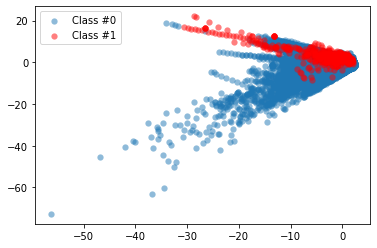

In [71]:
# We can see that fraud and non-fraud are highly imbalanced
plot_data(X, y)

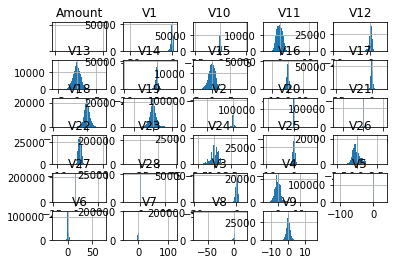

In [80]:
# Check distribution of input variables. We can see that the distribution of most of the PCA components is Gaussian
# drop the target variable
data = df.drop(['Class'], axis=1)
# create a histogram plot of each numeric variable
data = data.hist(bins=100)
# disable axis labels to avoid the clutter
for axis in data.flatten():
    axis.set_xticklabels([])
    axis.set_yticklabels([])
    pyplot.show()



3. Split data into train and test

In [81]:
y = df['Class']
X = df.drop(['Class'], axis = 1)

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

4. Fit different ML models' classifier 

In [83]:
# Logistic Regression
model_lr = LogisticRegression(random_state=1)

In [84]:
# Random Forest
model_rf = RandomForestClassifier(n_estimators = 100, random_state=1)

In [85]:
# K-Nearest Neighbors
model_knn = KNeighborsClassifier()

In [94]:
# Support Vector Machine
model_svc = SVC(probability=True,random_state=1)

In [95]:
# Gaussian Naive Bayes 
model_nb = GaussianNB()

In [96]:
# Extreme Gradient Boosting
model_xgb = XGBClassifier(random_state=1)

5. Get model results

In [88]:
# Define a funciton to calculate precision-recall area under curve
def pr_auc(y_true, probas_pred):
    # calculate precision-recall curve
    p, r, _ = precision_recall_curve(y_true, probas_pred)
    return auc(r, p)

In [89]:
# Define a function to print ROC, classification report, confusion matrix and AUC
def get_model_result(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    probs = model.predict_proba(X_test)
    print('The ROC_AUC_SCORE is:\n', roc_auc_score(y_test, probs[:,1]))
    print('The Classification report:\n', classification_report(y_test, predicted))
    print('The Confusion matrix:\n', confusion_matrix(y_true=y_test, y_pred=predicted))
    print('The AUC is :\n', pr_auc(y_test, probs[:,1]))


In [90]:
start = time.time()
get_model_result(X_train, y_train, X_test, y_test, model_lr)
end = time.time()
print('The total Execution Time for LR is : \n',  end - start)
   

The ROC_AUC_SCORE is:
 0.9689625052797334
The Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.88      0.62      0.73       147

    accuracy                           1.00     85443
   macro avg       0.94      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443

The Confusion matrix:
 [[85284    12]
 [   56    91]]
The AUC is :
 0.7647643649934706
The total Execution Time for LR is : 
 2.380115509033203


In [91]:
start = time.time()
get_model_result(X_train, y_train, X_test, y_test, model_rf)
end = time.time()
print('The total Execution Time for RF is : \n',  end - start) 

The ROC_AUC_SCORE is:
 0.9472216878685447
The Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.94      0.76      0.84       147

    accuracy                           1.00     85443
   macro avg       0.97      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443

The Confusion matrix:
 [[85289     7]
 [   35   112]]
The AUC is :
 0.8353330740514223
The total Execution Time for RF is : 
 217.57214069366455


In [92]:
start = time.time()
get_model_result(X_train, y_train, X_test, y_test, model_knn)
end = time.time()
print('The total Execution Time for KNN is : \n',  end - start)

The ROC_AUC_SCORE is:
 0.9250495593097489
The Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.94      0.72      0.82       147

    accuracy                           1.00     85443
   macro avg       0.97      0.86      0.91     85443
weighted avg       1.00      1.00      1.00     85443

The Confusion matrix:
 [[85289     7]
 [   41   106]]
The AUC is :
 0.8633562929150532
The total Execution Time for KNN is : 
 519.6497101783752


In [97]:
start = time.time()
get_model_result(X_train, y_train, X_test, y_test, model_svc)
end = time.time()
print('The total Execution Time for SVC is : \n',  end - start)

The ROC_AUC_SCORE is:
 0.9481883496223475
The Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.95      0.65      0.77       147

    accuracy                           1.00     85443
   macro avg       0.97      0.83      0.89     85443
weighted avg       1.00      1.00      1.00     85443

The Confusion matrix:
 [[85291     5]
 [   51    96]]
The AUC is :
 0.8169291163082927
The total Execution Time for SVC is : 
 1689.286046743393


In [98]:
start = time.time()
get_model_result(X_train, y_train, X_test, y_test, model_nb)
end = time.time()
print('The total Execution Time for NB is : \n',  end - start)

The ROC_AUC_SCORE is:
 0.9589472020284385
The Classification report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     85296
           1       0.06      0.84      0.12       147

    accuracy                           0.98     85443
   macro avg       0.53      0.91      0.55     85443
weighted avg       1.00      0.98      0.99     85443

The Confusion matrix:
 [[83475  1821]
 [   24   123]]
The AUC is :
 0.4095238830259104
The total Execution Time for NB is : 
 0.681588888168335


In [99]:
start = time.time()
get_model_result(X_train, y_train, X_test, y_test, model_xgb)
end = time.time()
print('The total Execution Time for XGB is : \n',  end - start)

The ROC_AUC_SCORE is:
 0.9720530633938063
The Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.93      0.78      0.85       147

    accuracy                           1.00     85443
   macro avg       0.97      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443

The Confusion matrix:
 [[85288     8]
 [   32   115]]
The AUC is :
 0.8524512174805029
The total Execution Time for XGB is : 
 51.53155064582825


6. Based on models' performance metrics, we combine top three classifiers-RF, KNN and XGB in the ensemble model

In [100]:
# Train ensemable model basesd on soft voting 
model_ensemble = VotingClassifier(estimators=[('rf', model_rf), ('knn', model_knn), ('xgb', model_xgb)], voting='soft')


In [101]:
# Get performance metrics for ensemble model. We can see that it predicts more number of ture postive and less number of false positive with high recall and AUC. 
# However, XGB is almost competitive with this ensemable model and use less time
start = time.time()
get_model_result(X_train, y_train, X_test, y_test, model_ensemble)
end = time.time()
print('The total Execution Time for Ensembled model is : \n',  end - start)

The ROC_AUC_SCORE is:
 0.9750383458579455
The Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.96      0.79      0.87       147

    accuracy                           1.00     85443
   macro avg       0.98      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443

The Confusion matrix:
 [[85291     5]
 [   31   116]]
The AUC is :
 0.8458709942119889
The total Execution Time for Ensembled model is : 
 841.6946392059326


7. Compare this ensemable model with SMOTE(Synthetic Minority Over-sampling Technique) in XGB on this imbalanced dataset

In [102]:
#Get the feature X and y
X, y = prep_data(df)


In [106]:
# Define SMOTE  
method = SMOTE()

In [107]:
# Create the resampled feature set
X_resampled, y_resampled = method.fit_sample(X, y)

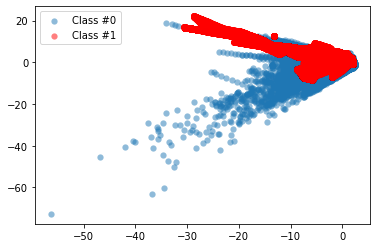

In [108]:
# Plot the resampled data, Now we see the  minority class is now much more prominently visible in the data. 
plot_data(X_resampled, y_resampled)

In [ ]:
# Print the value_counts on the original labels y
print(pd.value_counts(pd.Series(y)))


In [109]:
# Print the value_counts, we see the number of counts are same in class
print(pd.value_counts(y_resampled))


1.0    284315
0.0    284315
dtype: int64


In [118]:
# Deing resampling method
resampling = SMOTE(random_state=1)

In [119]:
# Apply sampling method on training data 
X_resampled, y_resampled = method.fit_sample(X_train, y_train)

In [120]:
# Build a pipeliine to chain SMOTE and model together
pipeline = Pipeline([('SMOTE', resampling), ('XGB', model_xgb)])

In [121]:
# using pipeline to combine with model
pipeline.fit(X_resampled, y_resampled)

Pipeline(steps=[('SMOTE', SMOTE(random_state=1)),
                ('XGB',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

In [122]:
# Make a prediction
predicted = pipeline.predict(X_test)

In [123]:
# Get predicted probability
probs = pipeline.predict_proba(X_test)

In [124]:
# Get the performance results .
start = time.time()
print('The ROC_AUC_SCORE is:\n', roc_auc_score(y_test, probs[:,1]))
print('The Classification report:\n', classification_report(y_test, predicted))
print('The Confusion matrix:\n', confusion_matrix(y_true=y_test, y_pred=predicted))
print('The AUC is :\n', pr_auc(y_test, probs[:,1]))
end = time.time()
print('The total Execution Time for SMOTE Combined with XGB is : \n',  end - start)

The ROC_AUC_SCORE is:
 0.9650142696358228
The Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.77      0.84      0.80       147

    accuracy                           1.00     85443
   macro avg       0.88      0.92      0.90     85443
weighted avg       1.00      1.00      1.00     85443

The Confusion matrix:
 [[85258    38]
 [   23   124]]
The AUC is :
 0.8447083739060371
The total Execution Time for SMOTE Combined with XGB is : 
 0.3188180923461914


 We can see that this model predicts We canmore number of TP and FP with almost the same AUC as ensemabled model and XGB alone. So overall, ensemable model is best if time is not a matter, otherwise, XGB could be used.